<a href="https://colab.research.google.com/github/UmaRafael/Dio-desafio-github-primeiro-reposit-rio/blob/main/Machine_Learning_Breat_Cancer_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ------------------------------------------------------------------------------------
### Aula Mineração de Dados - Pos Processamento dos Dados
### ------------------------------------------------------------------------------------
- Algoritmos:  Árvore de Decisão, KNN e Randon Forest
- Base de dados: Breast Cancer

### (1) Construção dos modelos de predição

In [ ]:
#Classification of cancer dignosis
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#importing the dados
dados = pd.read_csv('bases/breast_cancer_missing.csv')

#Pre-processamento
valores_ausentes = dados.isnull()
medias = dados.mean()
dados.fillna(medias, inplace=True)

dados = dados[dados['diagnosis'].notna()]

#Variáveis Dummy
dados = pd.get_dummies(dados,columns=['diagnosis'], drop_first=True)

#Muda o nome da coluna diagnosis
colunas = dados.drop('diagnosis_malignant', axis=1)
# obtem numpy.array bidimensional

#Faz a separação entre previsores e classe
X = colunas.values
y = dados['diagnosis_malignant']

#Preparação dos dados para treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                            y, train_size=0.7, test_size=0.3)

#Feature Scaling (Normalização)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

In [ ]:
X.shape, y.shape, X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((505, 31), (505,), (353, 31), (353,), (152, 31), (152,))

#### Incluindo as bibliotecas para avaliação dos modelos

In [ ]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

#### Árvore de Decisão

In [ ]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# instancia um DecisionTreeClassifier
clf_DT = DecisionTreeClassifier()

# treina o classificador
clf_DT.fit(X_treino, y_treino)
DT_pred = clf_DT.predict(X_teste)

#### Algoritmo KNN

In [ ]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# treina o classificador
clf_KNN.fit(X_treino, y_treino)
KNN_pred = clf_KNN.predict(X_teste)

#### Algoritmo Randon Forest

In [ ]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

# treina o classificador
clf_RF.fit(X_treino, y_treino)
RF_pred = clf_RF.predict(X_teste)

### (2) Matriz Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#### Árvore de Decisão

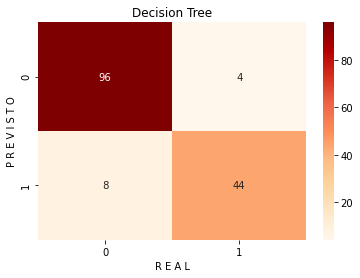

In [ ]:
sns.heatmap(confusion_matrix(y_teste, DT_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Decision Tree')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

#### KNN

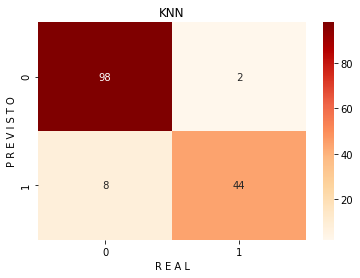

In [ ]:
sns.heatmap(confusion_matrix(y_teste, KNN_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('KNN')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

#### Randon Forest

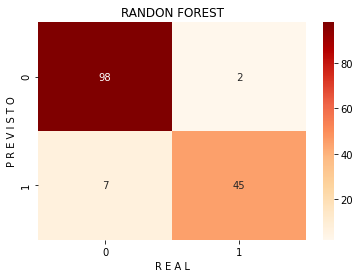

In [ ]:
sns.heatmap(confusion_matrix(y_teste, RF_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDON FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### (3) Avaliando os modelos

In [ ]:
# Acuracidade
print("ACC (DT) :%.2f" %(accuracy_score(y_teste,DT_pred)))
print("ACC (KNN) :%.2f" %(accuracy_score(y_teste,KNN_pred)))
print("ACC (RF) :%.2f" %(accuracy_score(y_teste,RF_pred)))

#Revocação
print("Recall (DT) :%.2f" %(recall_score(y_teste,DT_pred)))
print("Recall (KNN) :%.2f" %(recall_score(y_teste,KNN_pred)))
print("Recall (RF) :%.2f" %(recall_score(y_teste,RF_pred)))

#Precisão
print("Precision (DT) :%.2f" %(precision_score(y_teste,DT_pred)))
print("Precision (KNN) :%.2f" %(precision_score(y_teste,KNN_pred)))
print("Precision (RF) :%.2f" %(precision_score(y_teste,RF_pred)))

#F1-score
print("F1-score (DT) :%.2f" %(f1_score(y_teste,DT_pred)))
print("F1-score (KNN) :%.2f" %(f1_score(y_teste,KNN_pred)))
print("F1-score (RF) :%.2f" %(f1_score(y_teste,RF_pred)))


ACC (DT) :0.92
ACC (KNN) :0.93
ACC (RF) :0.94
Recall (DT) :0.85
Recall (KNN) :0.85
Recall (RF) :0.87
Precision (DT) :0.92
Precision (KNN) :0.96
Precision (RF) :0.96
F1-score (DT) :0.88
F1-score (KNN) :0.90
F1-score (RF) :0.91


### (4) Curvas ROC e AUC

Em aprendizagem de máquina, a medição de desempenho é uma tarefa crucial. As métricas ROC (Receiver Operating Characteristics) e AUC (Area Under The Curve) são as mais utilizadas para medir o desempenho de modelos de classificação.

ROC é uma curva de probabilidade. Ela é criada traçando a taxa verdadeiro-positivo contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição conta o número de vezes que o classificador errou a predição.

O AUC representa o grau ou medida de separabilidade. Quanto maior o AUC, melhor o modelo está em prever 0s como 0s e 1s como 1s. AUC resume a curva ROC num único valor, calculando a “área sob a curva”.

Um modelo excelente tem AUC próximo ao 1, o que significa que tem boa medida de separabilidade. Um modelo pobre tem AUC próximo do 0, o que significa que tem a pior medida de separabilidade, ou seja, está prevendo 0s como 1s e 1s como 0s. E quando a AUC é 0,5, significa que o modelo não tem capacidade de separação de classe.

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos.
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos.
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC=0.500
Decision Tree: ROC AUC=0.903
KNN: ROC AUC=0.978
Randon Forest: ROC AUC=0.984


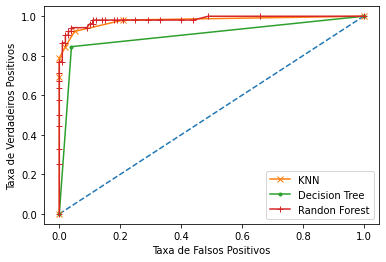

In [ ]:
ns_probs = [0 for _ in range(len(y_teste))] # gerar lista de zeros (sem habilidade)
ns_auc = roc_auc_score(y_teste, ns_probs)

#Decision Tree
DT_probs = clf_DT.predict_proba(X_teste)
DT_probs = DT_probs[:,1]
DT_auc = roc_auc_score(y_teste, DT_probs)

#KNN
KNN_probs = clf_KNN.predict_proba(X_teste)
KNN_probs = KNN_probs[:,1]
KNN_auc = roc_auc_score(y_teste, KNN_probs)

#Randon Forest
RF_probs = clf_RF.predict_proba(X_teste)
RF_probs = RF_probs[:,1]
RF_auc = roc_auc_score(y_teste, RF_probs)

print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('Decision Tree: ROC AUC=%.3f' %(DT_auc))
print('KNN: ROC AUC=%.3f' %(KNN_auc))
print('Randon Forest: ROC AUC=%.3f' %(RF_auc))

# calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_teste, ns_probs)
DT_tfp, DT_tvp, _ = roc_curve(y_teste, DT_probs)
KNN_tfp, KNN_tvp, _ = roc_curve(y_teste, KNN_probs)
RF_tfp, RF_tvp, _ = roc_curve(y_teste, RF_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--')
plt.plot(KNN_tfp, KNN_tvp, marker='x', label='KNN')
plt.plot(DT_tfp, DT_tvp, marker='.', label='Decision Tree')
plt.plot(RF_tfp, RF_tvp, marker='+', label='Randon Forest')


plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc=4)

plt.show()